In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def calculate_pre_snap_distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

In [36]:
# Create list for dataframe generation

'''
Define position groups
    offense:
        backs: QB, RB, FB
        wideouts: WR
        line: T, G, C
        
    defesne:
        line: DE, NT, DT
        backers: OLB, ILB, MLB, LB
        secondary: SS, FS, CB, DB
'''

snap_values = ['ball_snap', 'snap_direct']
offense = ['QB', 'RB', 'FB', 'WR', 'T', 'G', 'C', 'TE']
offense_backs = ['QB', 'RB', 'FB']
offense_wideouts = ['WR', 'TE']
offense_line = ['T', 'G', 'C']

defense = ['SS', 'FS', 'CB', 'DB', 'OLB', 'ILB', 'MLB', 'LB', 'DE', 'NT', 'DT']
defense_secondary = ['SS', 'FS', 'CB', 'DB']
defense_backers = ['OLB', 'ILB', 'MLB', 'LB']
defense_line = ['DE', 'NT', 'DT']

off_and_def_back7 = ['OLB', 'ILB', 'MLB', 'LB', 'SS', 'FS', 'CB', 'DB', 'QB', 'RB', 'FB', 'WR', 'TE']

In [38]:
# Week-independent dfs
# Import players dataset as df
players = pd.read_csv('provided_dataset/players.csv')

# Remove Offensive/Defensive Linemen to simplifiy dataset
players = players.loc[players['position'].isin(off_and_def_back7)]
player_nflids = players['nflId'].values

# Import play-by-play data as df
plays = pd.read_csv('provided_dataset/plays.csv')

In [39]:
# Import player tracking dataset as df
# Week 1
player_tracking1 = pd.read_csv('provided_dataset/tracking_week_1.csv')
# Remove football data from tracking dataset - not needed for pre-snap analysis
player_tracking1 = player_tracking1[player_tracking1.displayName != 'football']
# Remove Offensive/Defensive Linemen to simplifiy dataset
player_tracking1 = player_tracking1.loc[player_tracking1['nflId'].isin(player_nflids)]
print(player_tracking1.shape)

# Week 2
player_tracking2 = pd.read_csv('provided_dataset/tracking_week_2.csv')
# Remove football data from tracking dataset - not needed for pre-snap analysis
player_tracking2 = player_tracking2[player_tracking2.displayName != 'football']
# Remove Offensive/Defensive Linemen to simplifiy dataset
player_tracking2 = player_tracking2.loc[player_tracking2['nflId'].isin(player_nflids)]
print(player_tracking2.shape)

# Week 3
player_tracking3 = pd.read_csv('provided_dataset/tracking_week_3.csv')
# Remove football data from tracking dataset - not needed for pre-snap analysis
player_tracking3 = player_tracking3[player_tracking3.displayName != 'football']
# Remove Offensive/Defensive Linemen to simplifiy dataset
player_tracking3 = player_tracking3.loc[player_tracking3['nflId'].isin(player_nflids)]
print(player_tracking3.shape)

# Week 4
player_tracking4 = pd.read_csv('provided_dataset/tracking_week_4.csv')
# Remove football data from tracking dataset - not needed for pre-snap analysis
player_tracking4 = player_tracking4[player_tracking4.displayName != 'football']
# Remove Offensive/Defensive Linemen to simplifiy dataset
player_tracking4 = player_tracking4.loc[player_tracking4['nflId'].isin(player_nflids)]
print(player_tracking4.shape)

# Week 5
player_tracking5 = pd.read_csv('provided_dataset/tracking_week_5.csv')
# Remove football data from tracking dataset - not needed for pre-snap analysis
player_tracking5 = player_tracking5[player_tracking5.displayName != 'football']
# Remove Offensive/Defensive Linemen to simplifiy dataset
player_tracking5 = player_tracking5.loc[player_tracking5['nflId'].isin(player_nflids)]
print(player_tracking5.shape)

# Week 6
player_tracking6 = pd.read_csv('provided_dataset/tracking_week_6.csv')
# Remove football data from tracking dataset - not needed for pre-snap analysis
player_tracking6 = player_tracking6[player_tracking6.displayName != 'football']
# Remove Offensive/Defensive Linemen to simplifiy dataset
player_tracking6 = player_tracking6.loc[player_tracking6['nflId'].isin(player_nflids)]
print(player_tracking6.shape)

# Week 7
player_tracking7 = pd.read_csv('provided_dataset/tracking_week_7.csv')
# Remove football data from tracking dataset - not needed for pre-snap analysis
player_tracking7 = player_tracking7[player_tracking7.displayName != 'football']
# Remove Offensive/Defensive Linemen to simplifiy dataset
player_tracking7 = player_tracking7.loc[player_tracking7['nflId'].isin(player_nflids)]
print(player_tracking7.shape)

# Week 8
player_tracking8 = pd.read_csv('provided_dataset/tracking_week_8.csv')
# Remove football data from tracking dataset - not needed for pre-snap analysis
player_tracking8 = player_tracking8[player_tracking8.displayName != 'football']
# Remove Offensive/Defensive Linemen to simplifiy dataset
player_tracking8 = player_tracking8.loc[player_tracking8['nflId'].isin(player_nflids)]
print(player_tracking8.shape)

# Week 9
player_tracking9 = pd.read_csv('provided_dataset/tracking_week_9.csv')
# Remove football data from tracking dataset - not needed for pre-snap analysis
player_tracking9 = player_tracking9[player_tracking9.displayName != 'football']
# Remove Offensive/Defensive Linemen to simplifiy dataset
player_tracking9 = player_tracking9.loc[player_tracking9['nflId'].isin(player_nflids)]
print(player_tracking9.shape)

(4290270, 18)
(4046669, 18)
(4299101, 18)
(4068369, 18)
(4262869, 18)
(3767821, 18)
(3641744, 18)
(3979229, 18)
(3422604, 18)


In [20]:
# Smaller dataset used for debugging and testing to increase execution speed
player_tracking_two_weeks = pd.concat([player_tracking1, player_tracking2])

In [40]:
player_tracking_all = pd.concat([player_tracking1, player_tracking2, player_tracking3, player_tracking4, player_tracking5, player_tracking6, player_tracking7, player_tracking8, player_tracking9])

In [41]:
# Smaller dataset used for debugging and testing to increase execution speed

# Week 1
# Get all unique playId for a given week
play_ids_week1 = player_tracking1['playId'].unique()
# Get all unique nflId (players) for a given week
players_week1 = player_tracking1['nflId'].unique()

# Week 2
# Get all unique playId for a given week
play_ids_week2 = player_tracking2['playId'].unique()
# Get all unique nflId (players) for a given week
players_week2 = player_tracking2['nflId'].unique()

In [42]:
# Week 3
# Get all unique playId for a given week
play_ids_week3 = player_tracking3['playId'].unique()
# Get all unique nflId (players) for a given week
players_week3 = player_tracking3['nflId'].unique()

# Week 4
# Get all unique playId for a given week
play_ids_week4 = player_tracking4['playId'].unique()
# Get all unique nflId (players) for a given week
players_week4 = player_tracking4['nflId'].unique()

# Week 5
# Get all unique playId for a given week
play_ids_week5 = player_tracking5['playId'].unique()
# Get all unique nflId (players) for a given week
players_week5 = player_tracking5['nflId'].unique()

# Week 6
# Get all unique playId for a given week
play_ids_week6 = player_tracking6['playId'].unique()
# Get all unique nflId (players) for a given week
players_week6 = player_tracking6['nflId'].unique()

# Week 7
# Get all unique playId for a given week
play_ids_week7 = player_tracking7['playId'].unique()
# Get all unique nflId (players) for a given week
players_week7 = player_tracking7['nflId'].unique()

# Week 8
# Get all unique playId for a given week
play_ids_week8 = player_tracking8['playId'].unique()
# Get all unique nflId (players) for a given week
players_week8 = player_tracking8['nflId'].unique()

# Week 9
# Get all unique playId for a given week
play_ids_week9 = player_tracking9['playId'].unique()
# Get all unique nflId (players) for a given week
players_week9 = player_tracking9['nflId'].unique()

In [7]:
# Smaller dataset used for debugging and testing to increase execution speed
plays_all = np.append(play_ids_week1, play_ids_week2)
players_all = np.append(players_week1, players_week2)

In [43]:
plays_all = np.append(play_ids_week1, play_ids_week2)
plays_all = np.append(plays_all, play_ids_week3)
plays_all = np.append(plays_all, play_ids_week4)
plays_all = np.append(plays_all, play_ids_week5)
plays_all = np.append(plays_all, play_ids_week6)
plays_all = np.append(plays_all, play_ids_week7)
plays_all = np.append(plays_all, play_ids_week8)
plays_all = np.append(plays_all, play_ids_week9)

players_all = np.append(players_week1, players_week2)
players_all = np.append(players_all, players_week3)
players_all = np.append(players_all, players_week4)
players_all = np.append(players_all, players_week5)
players_all = np.append(players_all, players_week6)
players_all = np.append(players_all, players_week7)
players_all = np.append(players_all, players_week8)
players_all = np.append(players_all, players_week9)
players_all = np.unique(players_all)

In [44]:
distance_list = []

# Dataframes of interest
# players_week_all should be set to an array of unique nflIds of players to evaluate
# player_tracking should be a tracking df
players_week_all = players_all
player_tracking = player_tracking_all
player_count = len(players_all)
# For each player, create a dataframe of each of their plays
#i = 1
for nflId in players_week_all:
    #print(f'{i}/{player_count}')
    single_player_df = player_tracking[player_tracking['nflId'] == nflId]

    # Find the players position for downstream analysis
    player_position = players.loc[players['nflId'] == nflId, 'position'].values[0]

    # Find all of the plays which the player participted
    player_weekly_plays = single_player_df['playId'].unique()
    
    # For each play the player participated in, grab thier coordinates at line_set and 
    # at ball_snap. Calculate distance traveld between the two points, and add other releavant
    # game data for later use.
    for play_id in player_weekly_plays:
        try:
            single_play_df = single_player_df[single_player_df['playId'] == play_id]
            gameId = single_play_df.loc[single_play_df['event'] == 'line_set', 'gameId'].values[0]
            playId = single_play_df.loc[single_play_df['event'] == 'line_set', 'playId'].values[0]

            # Identify correct play in pxp data
            play_by_play_df = plays.loc[(plays['gameId'] == gameId) & (plays['playId'] == playId)]
            # Store pxp values for dataframe
            epa = play_by_play_df['expectedPointsAdded'].values[0]

            nflId = single_play_df.loc[single_play_df['event'] == 'line_set', 'nflId'].values[0]
            displayName = single_play_df.loc[single_play_df['event'] == 'line_set', 'displayName'].values[0]

            line_set_x = single_play_df.loc[single_play_df['event'] == 'line_set', 'x'].values[0]
            line_set_y = single_play_df.loc[single_play_df['event'] == 'line_set', 'y'].values[0]
            ball_snap_x = single_play_df.loc[single_play_df['event'].isin(snap_values), 'x'].values[0]
            ball_snap_y = single_play_df.loc[single_play_df['event'].isin(snap_values), 'y'].values[0]
            distance = calculate_pre_snap_distance(line_set_x, line_set_y, ball_snap_x, ball_snap_y)

            # Build a dictionary of key data pieces for future analysis
            distance_dict = {'gameId': gameId, 'playId': playId, 'nflId': nflId, 'displayName': displayName,
                             'position': player_position, 'line_set_x': line_set_x, 'line_set_y': line_set_y,
                             'ball_snap_x': ball_snap_x, 'ball_snap_y': ball_snap_y,
                             'distance': distance, 'epa': epa}

            distance_list.append(distance_dict)
 
        except IndexError:
            continue
    i = i + 1

# Build dataframe and drop duplicate entries from for-loop logic
distance_dataframe_week_all = pd.DataFrame(distance_list)

1/1128
2/1128
3/1128
4/1128
5/1128
6/1128
7/1128
8/1128
9/1128
10/1128
11/1128
12/1128
13/1128
14/1128
15/1128
16/1128
17/1128
18/1128
19/1128
20/1128
21/1128
22/1128
23/1128
24/1128
25/1128
26/1128
27/1128
28/1128
29/1128
30/1128
31/1128
32/1128
33/1128
34/1128
35/1128
36/1128
37/1128
38/1128
39/1128
40/1128
41/1128
42/1128
43/1128
44/1128
45/1128
46/1128
47/1128
48/1128
49/1128
50/1128
51/1128
52/1128
53/1128
54/1128
55/1128
56/1128
57/1128
58/1128
59/1128
60/1128
61/1128
62/1128
63/1128
64/1128
65/1128
66/1128
67/1128
68/1128
69/1128
70/1128
71/1128
72/1128
73/1128
74/1128
75/1128
76/1128
77/1128
78/1128
79/1128
80/1128
81/1128
82/1128
83/1128
84/1128
85/1128
86/1128
87/1128
88/1128
89/1128
90/1128
91/1128
92/1128
93/1128
94/1128
95/1128
96/1128
97/1128
98/1128
99/1128
100/1128
101/1128
102/1128
103/1128
104/1128
105/1128
106/1128
107/1128
108/1128
109/1128
110/1128
111/1128
112/1128
113/1128
114/1128
115/1128
116/1128
117/1128
118/1128
119/1128
120/1128
121/1128
122/1128
123/1128
1

In [45]:
play_by_play_analysis_list = []
distance_dataframe_week_all = distance_dataframe_week_all.sort_values(by=['gameId', 'playId', 'nflId'])
#print(distance_dataframe_week1.head())

for playId in plays_all:
    single_playId_df = distance_dataframe_week_all[distance_dataframe_week_all['playId'] == playId]
    
    # Check for duplicate playId for multiple gameId
    gameIds = single_playId_df['gameId'].unique()
    for gameId in gameIds:
        single_play_df = single_playId_df[single_playId_df['gameId'] == gameId]
        single_play_epa = single_play_df['epa'].values[0]

        # Group individual position distances into categories
        offense_distances = single_play_df.loc[single_play_df['position'].isin(offense), 'distance'].values
        offense_distance = offense_distances.sum()
        offense_distances_backs = single_play_df.loc[single_play_df['position'].isin(offense_backs), 'distance'].values
        offense_distance_backs = offense_distances_backs.sum()
        offense_distances_wideouts = single_play_df.loc[single_play_df['position'].isin(offense_wideouts), 'distance'].values
        offense_distance_wideouts = offense_distances_wideouts.sum()
        
        defense_distances = single_play_df.loc[single_play_df['position'].isin(defense), 'distance'].values
        defense_distance = defense_distances.sum()
        defense_distances_secondary = single_play_df.loc[single_play_df['position'].isin(defense_secondary), 'distance'].values
        defense_distance_secondary = defense_distances_secondary.sum()
        defense_distances_backers = single_play_df.loc[single_play_df['position'].isin(defense_backers), 'distance'].values
        defense_distance_backers = defense_distances_backers.sum()
        
        # Build a dictionary of key data pieces for future analysis
        play_by_play_analysis_dict = {'gameId': gameId, 'playId': playId, 'epa': single_play_epa,
                                        'offense_distance': offense_distance,
                                        'offense_distance_backs': offense_distance_backs,
                                        'offense_distance_wideouts': offense_distance_wideouts,
                                        'defense_distance': defense_distance,
                                        'defense_distance_secondary': defense_distance_secondary,
                                        'defense_distance_backers': defense_distance_backers}

        play_by_play_analysis_list.append(play_by_play_analysis_dict)

pxp_analysis_df = pd.DataFrame(play_by_play_analysis_list)
pxp_analysis_df['movement_ratio'] = pxp_analysis_df['defense_distance']/pxp_analysis_df['offense_distance']
print(pxp_analysis_df.shape)
pxp_analysis_df.head()

(61524, 10)


,gameId,playId,epa,offense_distance,offense_distance_backs,offense_distance_wideouts,defense_distance,defense_distance_secondary,defense_distance_backers,movement_ratio
0,2022091102,64,-0.576100,0.839693,0.593068,0.246625,7.391033,5.751407,1.639626,8.802069
1,2022091200,64,-0.362858,14.306954,2.025021,12.281933,12.655543,5.758683,6.896860,0.884573
2,2022091901,64,-0.065992,1.063344,0.429621,0.633722,10.941464,8.524515,2.416949,10.289676
3,2022092502,64,-0.677132,12.466484,12.200815,0.265669,17.581239,12.728058,4.853181,1.410281
4,2022102309,64,0.960395,0.237065,0.237065,0.000000,17.954398,14.513829,3.440569,75.736059


In [46]:
individual_player_recognition_list = []
recognition_rate_list = []
# For each player, create a dataframe of each of their play

# Dataframes of interest
# players_week_all should be set to an array of unique nflIds of players to evaluate
# player_tracking should be a tracking df

# Individuals for analysis
#players_week_all = [35459] # Kareem Jackson (SS)
#players_week_all = [46081] # Vita Vea (NT)
#players_week_all = [46080] # Minkah Fitzpatrick (FS)

players_week_all = players_all
player_tracking = player_tracking_all

for nflId in players_week_all:
    individual_player_recognition_list = []
    single_player_df = player_tracking[player_tracking['nflId'] == nflId]

    # Find the players position for downstream analysis
    player_position = players.loc[players['nflId'] == nflId, 'position'].values[0]
    if player_position in offense:
        continue

    # Find all of the plays which the player participted
    player_weekly_plays = single_player_df['playId'].unique()

    # Create a df of only the first full second post-snap for a given player
    # Get indexes of where the snap occurs for each play
    snap_indexes = single_player_df[single_player_df['event'].isin(snap_values)].index
    for snap_index in snap_indexes:
        try:
            first_second_df = single_player_df.loc[snap_index:snap_index+10]
        except KeyError:
            # Play is less than 1 second long and therefore shouldn't be included
            continue
        
        try:
            # Get data to enrich df
            gameId = first_second_df['gameId'].values[0]
            playId = first_second_df['playId'].values[0]
            displayName = first_second_df['displayName'].values[0]
            # Identify correct play in pxp data
            play_by_play_df = plays.loc[(plays['gameId'] == gameId) & (plays['playId'] == playId)]
            # Store pxp values for dataframe
            epa = play_by_play_df['expectedPointsAdded'].values[0]
    
            # Identify play as motion or non-motion
            # pxp_analysis_df contains presnap distance values for each position group
            play_distances = pxp_analysis_df.loc[(pxp_analysis_df['gameId'] == gameId) & (pxp_analysis_df['playId'] == playId)]
            back_distance = play_distances['offense_distance_backs'].values[0]
            wideout_distance = play_distances['offense_distance_wideouts'].values[0]
    
            back_motion_threshold = 3
            wideout_motion_threshold = 5
            has_motion = False
            if back_distance >= back_motion_threshold or wideout_distance >= wideout_motion_threshold:
                has_motion = True
    
            # Calculate peak and average acceleration/velocity
            avg_acc_array = first_second_df['a'].values
            avg_velo_array = first_second_df['s'].values
            avg_acc = sum(avg_acc_array) / len(avg_acc_array)
            peak_acc = max(avg_acc_array)
            
            recognition_dict = {'gameId': gameId, 'playId': playId, 'nflId': nflId, 'displayName': displayName,
                                'position': player_position, 'avg_acc': avg_acc, 'peak_acc': peak_acc,
                                'has_motion': has_motion, 'epa': epa}
            individual_player_recognition_list.append(recognition_dict)
        except IndexError:
            continue

    try:
        # Create a dataframe for each player
        # Dataframe contains average and peak acceleration across the first 1 second of the play
        # along with epa and a motion identifier
        individual_player_recognition_df = pd.DataFrame(individual_player_recognition_list)
        individual_player_recognition_df = individual_player_recognition_df.drop_duplicates()
        # Calculate the overall success rate (all plays) for the player
        total_play_count_all = len(individual_player_recognition_df['epa'].values)
        successful_play_count_all = (individual_player_recognition_df['epa'] <= 0).sum()
        success_rate_all = successful_play_count_all / total_play_count_all
    
        # Separate motion and non-motion plays
        motion_plays_df = individual_player_recognition_df.loc[individual_player_recognition_df['has_motion'] == True]
        non_motion_plays_df = individual_player_recognition_df.loc[individual_player_recognition_df['has_motion'] == False]
    
        # Calculate Stdev Filter [Variable % of stdev] and average values of acceleration (peak/average)
        filer_value = 0.75
        
        if motion_plays_df['peak_acc'].values.size > 0:
            player_avg_peak_acc_motion = np.mean(motion_plays_df['peak_acc'].values)
            stdev_filter_peak_motion = np.std(motion_plays_df['peak_acc'].values) * filer_value
        else:
            player_avg_peak_acc_motion = 0
            stdev_filter_peak_motion = 0
        
        if motion_plays_df['peak_acc'].values.size > 0:
            player_avg_peak_acc_non_motion = np.mean(non_motion_plays_df['peak_acc'].values)
            stdev_filter_peak_non_motion = np.std(non_motion_plays_df['peak_acc'].values) * filer_value
        else:
            player_avg_peak_acc_non_motion = 0
            stdev_filter_peak_non_motion = 0
        
        # Motion Plays
        # Top 25% of acceleration plays filter
        min_acc_filter_motion = player_avg_peak_acc_motion + stdev_filter_peak_motion
        # Bottom 25% of acceleration plays filter
        max_acc_filter_motion = player_avg_peak_acc_motion - stdev_filter_peak_motion
    
        # Non-Motion Plays
        # Top 25% of acceleration plays filter
        min_acc_filter_non_motion = player_avg_peak_acc_non_motion + stdev_filter_peak_non_motion
        # Bottom 25% of acceleration plays filter
        max_acc_filter_non_motion = player_avg_peak_acc_non_motion - stdev_filter_peak_non_motion
        
        # Defensive Success is defined by EPA <= epa_filter
        epa_filter = 0
        # --------------------------------------------------------------#
       
        # Calculate success rate for high acceleration plays (motion)
        # Count all high acceleration plays
        high_acc_play_count_motion = (motion_plays_df['peak_acc'] > min_acc_filter_motion).sum()
        # Count high acceleration + successful epa plays
        high_acc_play_success_count_motion = motion_plays_df[(motion_plays_df['peak_acc'] > min_acc_filter_motion) & (motion_plays_df['epa'] <= epa_filter)].shape[0]
        # Calculate success rate for low acceleration plays
        # Count all low acceleration plays
        low_acc_play_count_motion = (motion_plays_df['peak_acc'] < max_acc_filter_motion).sum()
        # Count low acceleration + successful epa plays
        low_acc_play_success_count_motion = motion_plays_df[(motion_plays_df['peak_acc'] < max_acc_filter_motion) & (motion_plays_df['epa'] <= epa_filter)].shape[0]
    
        # Calculate success rate for high acceleration plays (non-motion)
        # Count all high acceleration plays
        high_acc_play_count_non_motion = (non_motion_plays_df['peak_acc'] > min_acc_filter_non_motion).sum()
        # Count high acceleration + successful epa plays
        high_acc_play_success_count_non_motion = non_motion_plays_df[(non_motion_plays_df['peak_acc'] > min_acc_filter_non_motion) & (non_motion_plays_df['epa'] <= epa_filter)].shape[0]
        # Calculate success rate for low acceleration plays
        # Count all low acceleration plays
        low_acc_play_count_non_motion = (non_motion_plays_df['peak_acc'] < max_acc_filter_non_motion).sum()
        # Count low acceleration + successful epa plays
        low_acc_play_success_count_non_motion = non_motion_plays_df[(non_motion_plays_df['peak_acc'] < max_acc_filter_non_motion) & (non_motion_plays_df['epa'] <= epa_filter)].shape[0]
    
        if high_acc_play_count_motion > 0:
            high_acc_success_rate_motion = high_acc_play_success_count_motion / high_acc_play_count_motion     
        else:
            high_acc_success_rate_motion = 0
    
        if low_acc_play_count_motion > 0:
            low_acc_success_rate_motion = low_acc_play_success_count_motion / low_acc_play_count_motion
        else:
            low_acc_success_rate_motion = 0
    
        if high_acc_play_count_non_motion > 0:
            high_acc_success_rate_non_motion = high_acc_play_success_count_non_motion / high_acc_play_count_non_motion     
        else:
            high_acc_success_rate_non_motion = 0
    
        if low_acc_play_count_non_motion > 0:
            low_acc_success_rate_non_motion = low_acc_play_success_count_non_motion / low_acc_play_count_non_motion     
        else:
            low_acc_success_rate_non_motion = 0
    
        harr_delta = high_acc_success_rate_motion - high_acc_success_rate_non_motion
        larr_delta = low_acc_success_rate_motion - low_acc_success_rate_non_motion
    
        recognition_dict = {'nflId': nflId, 'Name': displayName, 'Position': player_position,
                            'total_play_count_all': total_play_count_all, 'successful_play_count_all': successful_play_count_all, 'success_rate_all': success_rate_all,
                            'high_acc_play_count_motion': high_acc_play_count_motion, 'high_acc_play_success_count_motion': high_acc_play_success_count_motion, 'HARR (motion)': high_acc_success_rate_motion,
                            'low_acc_play_count_motion': low_acc_play_count_motion, 'low_acc_play_success_count_motion': low_acc_play_success_count_motion, 'LARR (motion)': low_acc_success_rate_motion,
                            'high_acc_play_count_non_motion': high_acc_play_count_non_motion, 'high_acc_play_success_count_non_motion': high_acc_play_success_count_non_motion, 'HARR (non-motion)': high_acc_success_rate_non_motion,
                            'low_acc_play_count_non_motion': low_acc_play_count_non_motion, 'low_acc_play_success_count_non_motion': low_acc_play_success_count_non_motion, 'LARR (non-motion)': low_acc_success_rate_non_motion,
                            'HARR Delta (motion - non-motion)': harr_delta,
                            'LARR Delta (motion - non-motion)': larr_delta}
        recognition_rate_list.append(recognition_dict)
    except KeyError:
        continue
# Create a dataframe for each player
# Dataframe contains motion/non-motion stats and rates
player_recognition_df = pd.DataFrame(recognition_rate_list)
player_recognition_df = player_recognition_df.drop_duplicates()
#player_recognition_df.head()
player_recognition_df[['Name', 'Position', 'HARR (motion)', 'HARR (non-motion)', 'HARR Delta (motion - non-motion)', 'LARR (motion)', 'LARR (non-motion)', 'LARR Delta (motion - non-motion)']].head()

/Users/drewshayotovich/Library/CloudStorage/GoogleDrive-ashayoto@gmail.com/My Drive/ashayotovich/big_data_bowl_2025/pythonProject/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/drewshayotovich/Library/CloudStorage/GoogleDrive-ashayoto@gmail.com/My Drive/ashayotovich/big_data_bowl_2025/pythonProject/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/drewshayotovich/Library/CloudStorage/GoogleDrive-ashayoto@gmail.com/My Drive/ashayotovich/big_data_bowl_2025/pythonProject/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/drewshayotovich/Library/CloudStorage/GoogleDrive-ashayoto@gmail.com/My Drive/ashayotovich/big_data_bowl_2025/pyth

,Name,Position,HARR (motion),HARR (non-motion),HARR Delta (motion - non-motion),LARR (motion),LARR (non-motion),LARR Delta (motion - non-motion)
0,Kareem Jackson,SS,0.696970,0.666667,0.030303,0.590909,0.650000,-0.059091
1,Devin McCourty,FS,0.574074,0.596154,-0.022080,0.677419,0.553571,0.123848
2,Carlos Dunlap,OLB,0.400000,0.482759,-0.082759,0.652174,0.677419,-0.025245
3,Von Miller,OLB,0.500000,0.720000,-0.220000,0.470588,0.607143,-0.136555
4,Patrick Peterson,CB,0.642857,0.606557,0.036300,0.659091,0.589041,0.070050


In [65]:
play_counts = player_recognition_df['total_play_count_all'].values
average_play_counts = play_counts.mean()
stdev_play_counts = play_counts.std()
minimum_play_count = average_play_counts

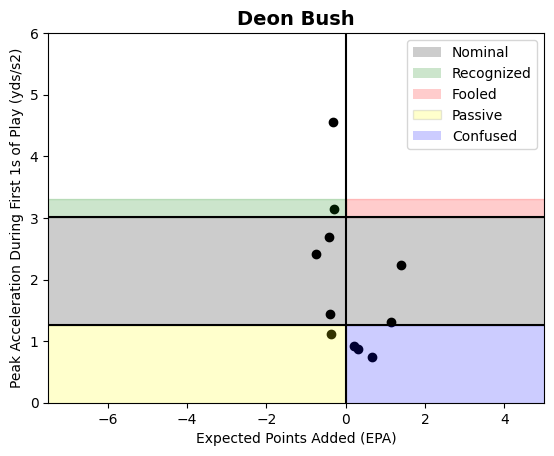

In [12]:
fig, ax = plt.subplots()

max_acc_buffer = motion_plays_df['peak_acc'].values.max() + 2
max_acc = motion_plays_df['peak_acc'].values.max()
min_acc_buffer = motion_plays_df['peak_acc'].values.min() - 2
min_acc = motion_plays_df['peak_acc'].values.min()

plt.scatter(motion_plays_df['epa'], motion_plays_df['peak_acc'], color='black')
plt.scatter(non_motion_plays_df['epa'], non_motion_plays_df['peak_acc'], color='black')
plt.axvline(x=0, color='black', linestyle='-')  # 'solid' is the default linestyle
plt.axhline(y=min_acc_filter_non_motion, color='black', linestyle='-')  # 'solid' is the default linestyle
plt.axhline(y=max_acc_filter_non_motion, color='black', linestyle='-')  # 'solid' is the default linestyle

# Plot Formatting
# Axes
plt.xlim(-7.5, 5)
#plt.ylim(0, 4.5)
plt.ylim(0, 6)
plt.xlabel('Expected Points Added (EPA)')
plt.ylabel('Peak Acceleration During First 1s of Play (yds/s2)')
plt.title(f'{displayName}', fontsize=14, fontweight='semibold')

# Legend
legend_elements = [Patch(facecolor='black', alpha=0.2,label='Nominal'),
                    Patch(facecolor='green', alpha=0.2,label='Recognized'),
                    Patch(facecolor='red', alpha=0.2,label='Fooled'),
                    Patch(facecolor='yellow', alpha=0.2,label='Passive', edgecolor='grey'),
                    Patch(facecolor='b', alpha=0.2,label='Confused')]
ax.legend(handles=legend_elements)


# Shading
all_x = [-10, 10]
pos_x = [0, 10]
neg_x = [-10, 0]
ax.fill_between(all_x, min_acc_filter_non_motion, max_acc_filter_non_motion, alpha=0.2, color='black')
ax.fill_between(pos_x, min_acc_filter_non_motion, max_acc_buffer, alpha=0.2, color='red')
ax.fill_between(pos_x, max_acc_filter_non_motion, min_acc_buffer, alpha=0.2, color='b')
ax.fill_between(neg_x, min_acc_filter_non_motion, max_acc_buffer, alpha=0.2, color='green')
ax.fill_between(neg_x, max_acc_filter_non_motion, min_acc_buffer, alpha=0.2, color='yellow')

plt.savefig(f'recognition_plot_{displayName}.png')
#plt.show()

[6.4 4.8]


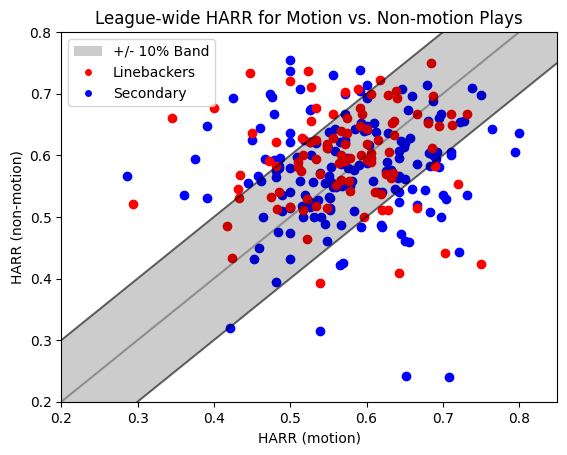

In [68]:
secondary_recognition_df = player_recognition_df.loc[player_recognition_df['Position'].isin(defense_secondary)]
backers_recognition_df = player_recognition_df.loc[player_recognition_df['Position'].isin(defense_backers)]

# Filter out 100%/0% values due to low rep count
secondary_recognition_df = secondary_recognition_df[(secondary_recognition_df['HARR (motion)'] < 0.99) & (secondary_recognition_df['HARR (motion)'] > 0)]
backers_recognition_df = backers_recognition_df[(backers_recognition_df['HARR (motion)'] < 0.99) & (backers_recognition_df['HARR (motion)'] > 0)]

secondary_recognition_df = secondary_recognition_df[(secondary_recognition_df['HARR (non-motion)'] < 0.99) & (secondary_recognition_df['HARR (non-motion)'] > 0)]
backers_recognition_df = backers_recognition_df[(backers_recognition_df['HARR (non-motion)'] < 0.99) & (backers_recognition_df['HARR (non-motion)'] > 0)]

secondary_recognition_df = secondary_recognition_df[(secondary_recognition_df['total_play_count_all'] > minimum_play_count)]
backers_recognition_df = backers_recognition_df[(backers_recognition_df['total_play_count_all'] > minimum_play_count)]

fig, ax = plt.subplots()
plt.scatter(secondary_recognition_df['HARR (motion)'], secondary_recognition_df['HARR (non-motion)'], color='b')
plt.scatter(backers_recognition_df['HARR (motion)'], backers_recognition_df['HARR (non-motion)'], color='r')

# Generate some bounding lines
x1 = [0, 1]
y1 = x1
x2 = [0, 1]
y2 = [0.1, 1.1]
x3 = [0, 1]
y3 = [-0.1, 0.9]

# Plot the line
plt.plot(x1, y1, color='black', alpha=0.3)
plt.plot(x2, y2, color='black', alpha=0.5)
plt.plot(x3, y3, color='black', alpha=0.5)

plt.xlim(0.2,0.85)
plt.ylim(0.2,0.8)

plt.xlabel('HARR (motion)')
plt.ylabel('HARR (non-motion)')
plt.title('League-wide HARR for Motion vs. Non-motion Plays')

ax.fill_between(x1, y2, y3, alpha=0.2, color='black')

legend_elements = [Patch(facecolor='black', alpha=0.2,label='+/- 10% Band'),
                    Line2D([0], [0], marker='o', color='w', label='Linebackers', markerfacecolor='r'),
                    Line2D([0], [0], marker='o', color='w', label='Secondary', markerfacecolor='b')]
ax.legend(handles=legend_elements)
print(fig.get_size_inches())
plt.savefig('league_wide_HARR.png')
plt.show()

In [86]:
#backers_recognition_df.sort_values(by=['HARR (motion)'],ascending=False).head()
ilb_recognition_df = backers_recognition_df.loc[(backers_recognition_df['Position'] == 'ILB')]
ilb_recognition_df[['Name', 'Position', 'total_play_count_all', 'success_rate_all', 'HARR (motion)', 'HARR (non-motion)', 'HARR Delta (motion - non-motion)', 'LARR (motion)', 'LARR (non-motion)', 'LARR Delta (motion - non-motion)']].sort_values(by=['success_rate_all'],ascending=False).head(20)

,Name,Position,total_play_count_all,success_rate_all,HARR (motion),HARR (non-motion),HARR Delta (motion - non-motion),LARR (motion),LARR (non-motion),LARR Delta (motion - non-motion)
85,Alex Singleton,ILB,272,0.632353,0.629630,0.605263,0.024366,0.642857,0.700000,-0.057143
293,Dre Greenlaw,ILB,317,0.630915,0.592593,0.600000,-0.007407,0.631579,0.750000,-0.118421
446,Baron Browning,ILB,220,0.622727,0.636364,0.656250,-0.019886,0.666667,0.566667,0.100000
198,Fred Warner,ILB,399,0.621554,0.564103,0.586957,-0.022854,0.720930,0.640000,0.080930
300,Cole Holcomb,ILB,395,0.617722,0.711538,0.650000,0.061538,0.591837,0.604167,-0.012330
354,Logan Wilson,ILB,444,0.612613,0.689655,0.583333,0.106322,0.566667,0.666667,-0.100000
396,Jonas Griffith,ILB,288,0.607639,0.720000,0.553191,0.166809,0.625000,0.574468,0.050532
339,Jordyn Brooks,ILB,537,0.607076,0.566667,0.639344,-0.072678,0.625000,0.676056,-0.051056
184,Leighton Vander Esch,ILB,394,0.604061,0.666667,0.666667,0.000000,0.586207,0.555556,0.030651
258,Devin Bush,ILB,323,0.603715,0.606061,0.700000,-0.093939,0.675676,0.555556,0.120120


In [82]:
secondary_recognition_df[['Name', 'Position', 'total_play_count_all', 'success_rate_all', 'HARR (motion)', 'HARR (non-motion)', 'HARR Delta (motion - non-motion)', 'LARR (motion)', 'LARR (non-motion)', 'LARR Delta (motion - non-motion)']].sort_values(by=['HARR Delta (motion - non-motion)'], ascending=False).head(20)

,Name,Position,total_play_count_all,success_rate_all,HARR (motion),HARR (non-motion),HARR Delta (motion - non-motion),LARR (motion),LARR (non-motion),LARR Delta (motion - non-motion)
388,Geno Stone,SS,243,0.563786,0.708333,0.240000,0.468333,0.769231,0.636364,0.132867
428,Trevon Moehrig,FS,293,0.515358,0.652174,0.241379,0.410795,0.516129,0.666667,-0.150538
169,Kenny Moore,CB,515,0.574757,0.720930,0.442623,0.278307,0.596154,0.666667,-0.070513
523,Kerby Joseph,FS,267,0.513109,0.538462,0.314286,0.224176,0.640000,0.756757,-0.116757
117,Jalen Mills,CB,337,0.596439,0.696970,0.500000,0.196970,0.707317,0.586957,0.120361
29,Duron Harmon,SS,446,0.513453,0.656250,0.460000,0.196250,0.564103,0.661017,-0.096914
357,Brandon Jones,FS,316,0.582278,0.731707,0.535714,0.195993,0.568182,0.615385,-0.047203
88,Eli Apple,CB,399,0.641604,0.794872,0.605263,0.189609,0.660000,0.653061,0.006939
248,Brandon Facyson,CB,219,0.566210,0.650000,0.461538,0.188462,0.555556,0.666667,-0.111111
42,Bradley Roby,CB,312,0.596154,0.703704,0.529412,0.174292,0.666667,0.578947,0.087719


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [91]:
isaiah_simmons_df = backers_recognition_df.loc[(backers_recognition_df['Name'] == 'Isaiah Simmons')]
kenny_moore_df = secondary_recognition_df.loc[(secondary_recognition_df['Name'] == 'Kenny Moore')]

[6.4 4.8]


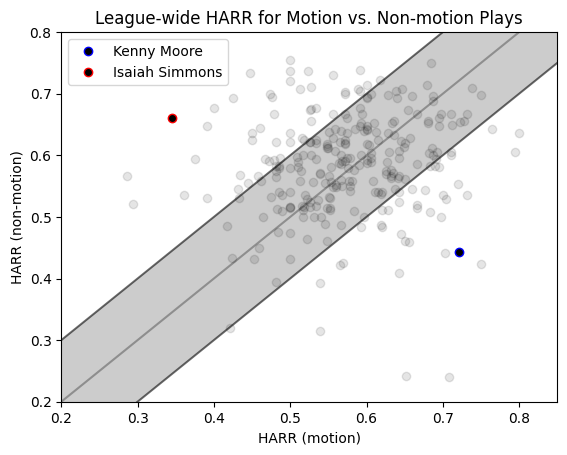

In [95]:
secondary_recognition_df = player_recognition_df.loc[player_recognition_df['Position'].isin(defense_secondary)]
backers_recognition_df = player_recognition_df.loc[player_recognition_df['Position'].isin(defense_backers)]

# Filter out 100%/0% values due to low rep count
secondary_recognition_df = secondary_recognition_df[(secondary_recognition_df['HARR (motion)'] < 0.99) & (secondary_recognition_df['HARR (motion)'] > 0)]
backers_recognition_df = backers_recognition_df[(backers_recognition_df['HARR (motion)'] < 0.99) & (backers_recognition_df['HARR (motion)'] > 0)]

secondary_recognition_df = secondary_recognition_df[(secondary_recognition_df['HARR (non-motion)'] < 0.99) & (secondary_recognition_df['HARR (non-motion)'] > 0)]
backers_recognition_df = backers_recognition_df[(backers_recognition_df['HARR (non-motion)'] < 0.99) & (backers_recognition_df['HARR (non-motion)'] > 0)]

secondary_recognition_df = secondary_recognition_df[(secondary_recognition_df['total_play_count_all'] > minimum_play_count)]
backers_recognition_df = backers_recognition_df[(backers_recognition_df['total_play_count_all'] > minimum_play_count)]

fig, ax = plt.subplots()
plt.scatter(secondary_recognition_df['HARR (motion)'], secondary_recognition_df['HARR (non-motion)'], color='black', alpha=0.1)
plt.scatter(backers_recognition_df['HARR (motion)'], backers_recognition_df['HARR (non-motion)'], color='black', alpha=0.1)
plt.scatter(isaiah_simmons_df['HARR (motion)'], isaiah_simmons_df['HARR (non-motion)'], color='black', edgecolors='r')
plt.scatter(kenny_moore_df['HARR (motion)'], kenny_moore_df['HARR (non-motion)'], color='black', edgecolors='b')

# Generate some bounding lines
x1 = [0, 1]
y1 = x1
x2 = [0, 1]
y2 = [0.1, 1.1]
x3 = [0, 1]
y3 = [-0.1, 0.9]

# Plot the line
plt.plot(x1, y1, color='black', alpha=0.3)
plt.plot(x2, y2, color='black', alpha=0.5)
plt.plot(x3, y3, color='black', alpha=0.5)

plt.xlim(0.2,0.85)
plt.ylim(0.2,0.8)

plt.xlabel('HARR (motion)')
plt.ylabel('HARR (non-motion)')
plt.title('League-wide HARR for Motion vs. Non-motion Plays')

ax.fill_between(x1, y2, y3, alpha=0.2, color='black')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Isaiah Simmons', markerfacecolor='black', markeredgecolor='r'),
                   Line2D([0], [0], marker='o', color='w', label='Kenny Moore', markerfacecolor='black', markeredgecolor='blue')]
ax.legend(handles=legend_elements)
print(fig.get_size_inches())
plt.savefig('highlighted_HARR.png')
plt.show()